In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.metrics import confusion_matrix

In [108]:
dataset_dir = 'dataset'

In [129]:
datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

In [130]:
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(300, 300),
    batch_size=32,
    color_mode ="grayscale",
    class_mode='binary',
    shuffle=True,
    subset='training',
    seed=107)

Found 1590 images belonging to 2 classes.


In [131]:
validation_generator = datagen.flow_from_directory(
    dataset_dir, 
    target_size=(300, 300),
    batch_size=32,
    color_mode ="grayscale",
    class_mode='binary',
    shuffle=True,
    subset='validation',
    seed=107)

Found 530 images belonging to 2 classes.


In [243]:
imgs, labels = next(train_generator)

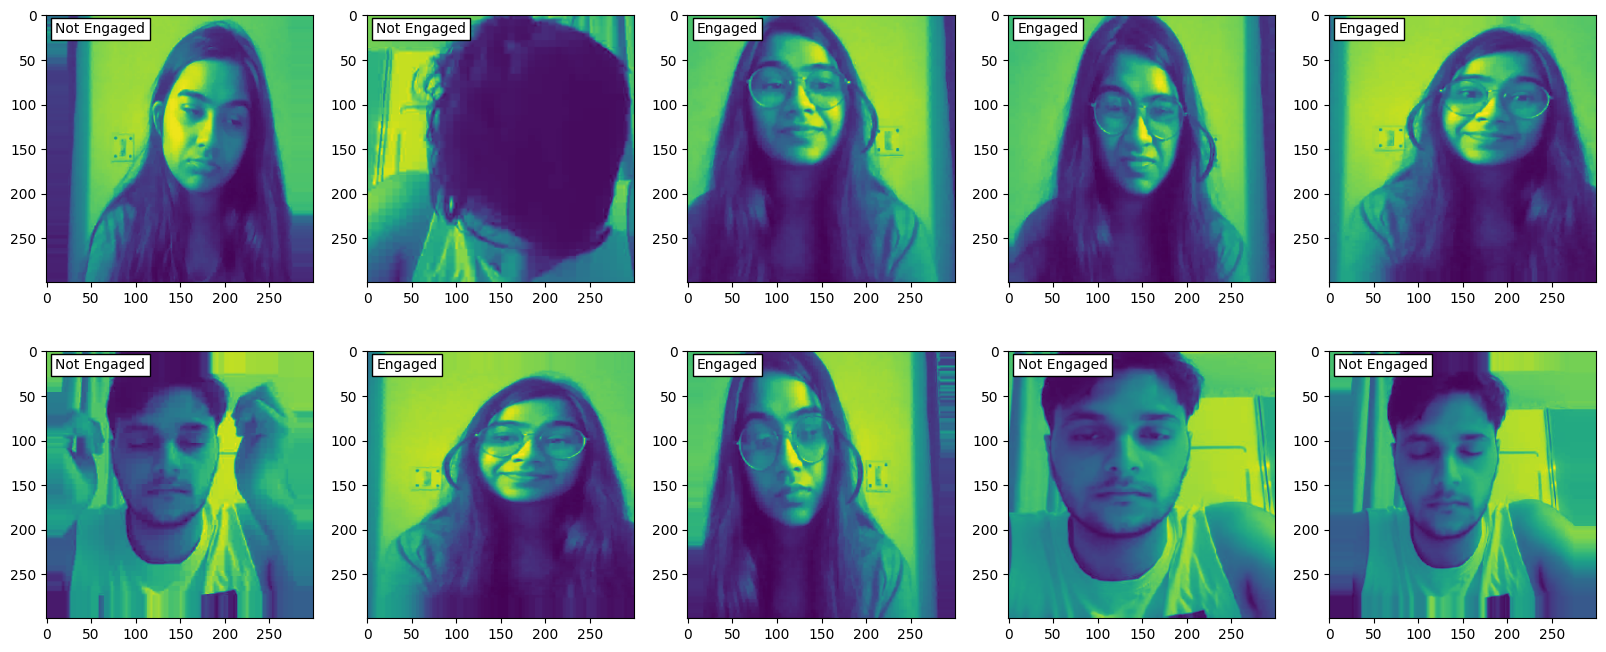

In [244]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for img, ax, label in zip(imgs, axes, labels):
    ax.imshow(img)
    if label==0: text='Engaged'
    else: text='Not Engaged'
    ax.text(10, 20, text, bbox={'facecolor': 'white', 'pad': 3})

plt.show()

In [85]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(300, 300, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 300, 300, 32)      320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 150, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 360000)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [86]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [87]:
history = model.fit(x=train_generator,
                    validation_data=validation_generator,
                    epochs=10, 
                    verbose=1)

Epoch 1/10
50/50 [==============================] - 43s 845ms/step - loss: 0.4426 - accuracy: 0.8031 - val_loss: 0.1952 - val_accuracy: 0.9925
Epoch 2/10
50/50 [==============================] - 42s 833ms/step - loss: 0.2931 - accuracy: 0.8667 - val_loss: 0.1031 - val_accuracy: 0.9981
Epoch 3/10
50/50 [==============================] - 42s 832ms/step - loss: 0.2607 - accuracy: 0.9013 - val_loss: 0.1054 - val_accuracy: 0.9887
Epoch 4/10
50/50 [==============================] - 42s 834ms/step - loss: 0.2036 - accuracy: 0.9239 - val_loss: 0.2373 - val_accuracy: 0.8981
Epoch 5/10
50/50 [==============================] - 42s 829ms/step - loss: 0.1669 - accuracy: 0.9428 - val_loss: 0.0682 - val_accuracy: 0.9981
Epoch 6/10
50/50 [==============================] - 41s 827ms/step - loss: 0.1413 - accuracy: 0.9547 - val_loss: 0.0644 - val_accuracy: 0.9943
Epoch 7/10
50/50 [==============================] - 41s 824ms/step - loss: 0.1121 - accuracy: 0.9642 - val_loss: 0.0629 - val_accuracy: 0.9906

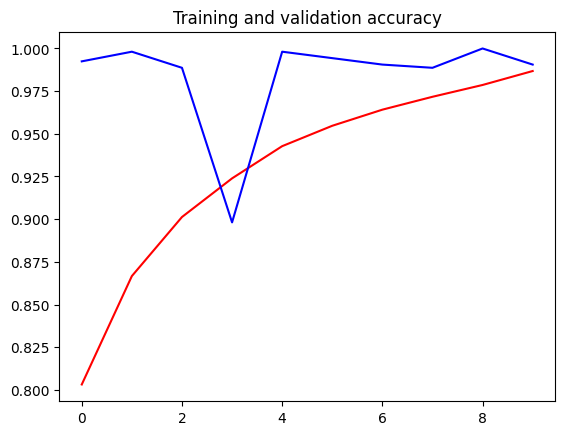

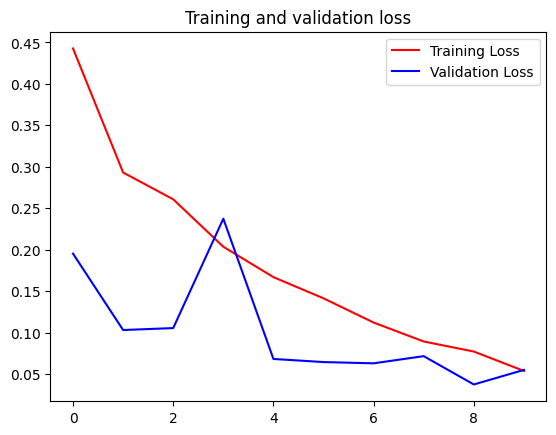

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

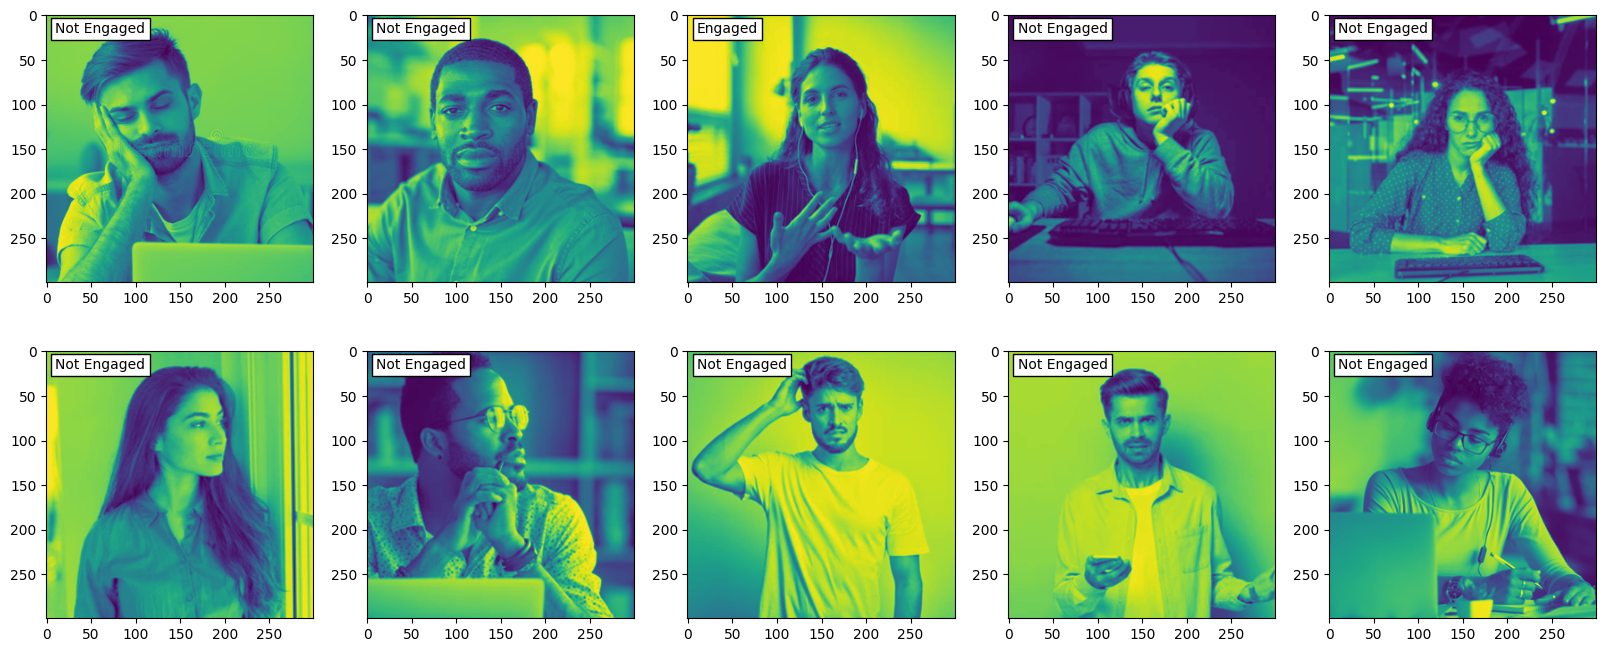

In [245]:
from image_crop import crop_square

test_dir = r'test_dataset'

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for path, ax in zip (os.listdir(test_dir), axes):
    path = os.path.join(test_dir, path)
    
    img = Image.open(path)
    img = crop_square(img)
    img = img.convert("L").resize((300, 300))

    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    pred = model.predict(images, batch_size=10, verbose=0)
    
    ax.imshow(img)
    if pred[0][0]==0: text='Engaged'
    else: text='Not Engaged'
    ax.text(10, 20, text, bbox={'facecolor': 'white', 'pad': 3})

plt.show()